---
title: Week 6 - Code Exercise
jupyter: python3
format:
  html:
    toc: true
---

## Modeling Workflow
---

```
1. Data Understanding
2. Data Exploration and Preprocessing
3. Training a Machine Learning Models
4. Test Prediction
```

## Data Understanding
### Airbnb Prices European Cities (Dataset) 

About [Dataset](https://www.kaggle.com/datasets/cahyaalkahfi/airbnb-european-cities-join/)

This dataset provides Airbnb price information from various cities in Europe, including Amsterdam, Athens, Barcelona, Berlin, Budapest, Lisbon, London, Paris, Rome, and Vienna. This dataset is the result of merging the following datasets: Airbnb Prices in European Cities, which are stored in separate files for each city and period. Therefore, this dataset includes two additional columns: city, indicating the city information, and weekends, indicating whether the stay period occurred during the weekend or not.

Features:

- **realSum**: The total price of the Airbnb listing. (Numeric)
- **room_type**: The type of room being offered (e.g. private, shared, etc.). (Categorical)
- **room_shared**: Whether the room is shared or not (Boolean)
- **room_private**: Whether the room is private or not (Boolean)
- **person_capacity**: The maximum number of people that can stay in the room (Numeric)
- **host_is_superhost**: Whether the host is a super host or not (Boolean)
- **multi**: Whether the listing is for multiple rooms or not (Boolean)
- **biz**: Whether the listing is for business purposes or not (Boolean)
- **cleanliness_rating**: The cleanliness rating of the listing (Numeric)
- **guest_satisfaction_overall**: The overall guest satisfaction rating of the listing (Numeric)
- **bedrooms**: The number of bedrooms in the listing (Numeric)
- **dist**: The distance from the city center (Numeric)
- **metro_dist**: The distance from the nearest metro station (Numeric)
- **city**: The city where the listing is located (Categoric)
- **weekends**: Whether the period is on weekends or not (Boolean)

### Modeling Objective

- **Regression**: Predicting the price of the Airbnb listing based on the available features.
- **Target Variable**: `realSum`

### Import Data

In [1]:
import pandas as pd
import numpy as np

# Create a function to read the data
def read_data(fname):
    data = pd.read_csv(fname)
    print('Data shape raw               :', data.shape)
    print('Number of duplicate          :', data.duplicated().sum())
    data = data.drop_duplicates()
    print('Data shape after dropping    :', data.shape)
    print('Data shape final             :', data.shape)
    return data

# Load the dataset
df = read_data('airbnb_european-cities.csv')
df.head()

Data shape raw               : (51707, 15)
Number of duplicate          : 0
Data shape after dropping    : (51707, 15)
Data shape final             : (51707, 15)


,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,city,weekends
0,319.640053,Private room,False,True,2,False,0,1,9,88,1,4.763360,0.852117,Amsterdam,True
1,347.995219,Private room,False,True,2,False,0,1,9,87,1,5.748310,3.651591,Amsterdam,True
2,482.975183,Private room,False,True,4,False,0,1,9,90,2,0.384872,0.439852,Amsterdam,True
3,485.552926,Private room,False,True,2,True,0,0,10,98,1,0.544723,0.318688,Amsterdam,True
4,2771.541724,Entire home/apt,False,False,4,True,0,0,10,100,3,1.686798,1.458399,Amsterdam,True


Tidak terdapat data duplikat pada dataset.

## Data Exploration and Preprocessing

### Target-Predictor Split

In [2]:
def extractInputOutput(data,
                       output_column_name):
    """
    Fungsi untuk memisahkan data input (predictor) dan output (target)
    :param data: <pandas dataframe> data seluruh sample
    :param output_column_name: <string> nama kolom output
    :return input_data: <pandas dataframe> data input
    :return output_data: <pandas series> data output
    """
    output_data = data[output_column_name]
    input_data = data.drop(output_column_name,
                           axis = 1)
    
    return input_data, output_data

In [3]:
X, y = extractInputOutput(df, 'realSum')
X.head()

,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,city,weekends
0,Private room,False,True,2,False,0,1,9,88,1,4.763360,0.852117,Amsterdam,True
1,Private room,False,True,2,False,0,1,9,87,1,5.748310,3.651591,Amsterdam,True
2,Private room,False,True,4,False,0,1,9,90,2,0.384872,0.439852,Amsterdam,True
3,Private room,False,True,2,True,0,0,10,98,1,0.544723,0.318688,Amsterdam,True
4,Entire home/apt,False,False,4,True,0,0,10,100,3,1.686798,1.458399,Amsterdam,True


In [4]:
y.head()

0     319.640053
1     347.995219
2     482.975183
3     485.552926
4    2771.541724
Name: realSum, dtype: float64

### Train-Test Split

In [5]:
# Import train-test splitting library dari sklearn (scikit learn)
from sklearn.model_selection import train_test_split
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.20,
                                                    random_state = 123)

In [6]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((41365, 14), (10342, 14), (41365,), (10342,))

### Data Exploration (EDA)

**Data Description**

In [7]:
y.describe().transpose()

count    51707.000000
mean       279.879591
std        327.948386
min         34.779339
25%        148.752174
50%        211.343089
75%        319.694287
max      18545.450285
Name: realSum, dtype: float64

In [8]:
# Buat kolom numerik (float64, int64)
numerical_column = X_train.select_dtypes(include = ['float64', 'int64']).columns
# Seleksi dataframe numerik
X_train_num = X_train[numerical_column]
X_train_num.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
person_capacity,41365.0,3.159555,1.299105,2.000000,2.000000,3.000000,4.000000,6.000000
multi,41365.0,0.292469,0.454902,0.000000,0.000000,0.000000,1.000000,1.000000
biz,41365.0,0.349232,0.476733,0.000000,0.000000,0.000000,1.000000,1.000000
cleanliness_rating,41365.0,9.389798,0.961407,2.000000,9.000000,10.000000,10.000000,10.000000
guest_satisfaction_overall,41365.0,92.625988,8.973694,20.000000,90.000000,95.000000,99.000000,100.000000
bedrooms,41365.0,1.157524,0.629274,0.000000,1.000000,1.000000,1.000000,10.000000
dist,41365.0,3.201151,2.404934,0.015059,1.455969,2.619259,4.272217,25.284557
metro_dist,41365.0,0.685741,0.869892,0.003220,0.248290,0.413204,0.740167,14.273577


In [9]:
# Buat kolom kategorik (object, bool)
categorical_column = X_train.select_dtypes(include = ['object', 'bool']).columns
# Seleksi dataframe kategorik
X_train_cat = X_train[categorical_column]
X_train_cat.describe().transpose()

,count,unique,top,freq
room_type,41365,3,Entire home/apt,26143
room_shared,41365,2,False,41080
room_private,41365,2,False,26428
host_is_superhost,41365,2,False,30723
city,41365,10,London,8049
weekends,41365,2,True,21008


**Missing Value**

In [10]:
# Cek missing value
X_train.isnull().sum()

room_type                     0
room_shared                   0
room_private                  0
person_capacity               0
host_is_superhost             0
multi                         0
biz                           0
cleanliness_rating            0
guest_satisfaction_overall    0
bedrooms                      0
dist                          0
metro_dist                    0
city                          0
weekends                      0
dtype: int64

Tidak terdapat missing value pada dataset.

**Distribution of Target Variable**

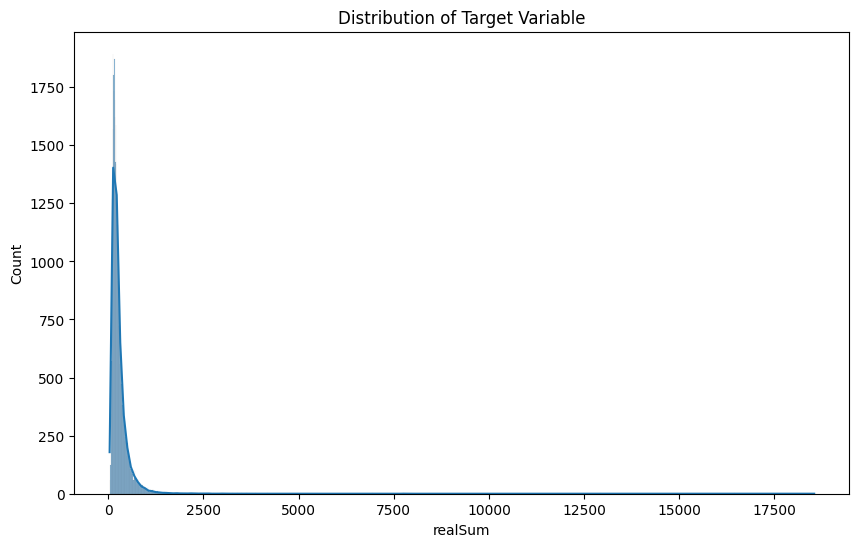

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10, 6))
sns.histplot(y_train, kde = True)
plt.title('Distribution of Target Variable')
plt.show()

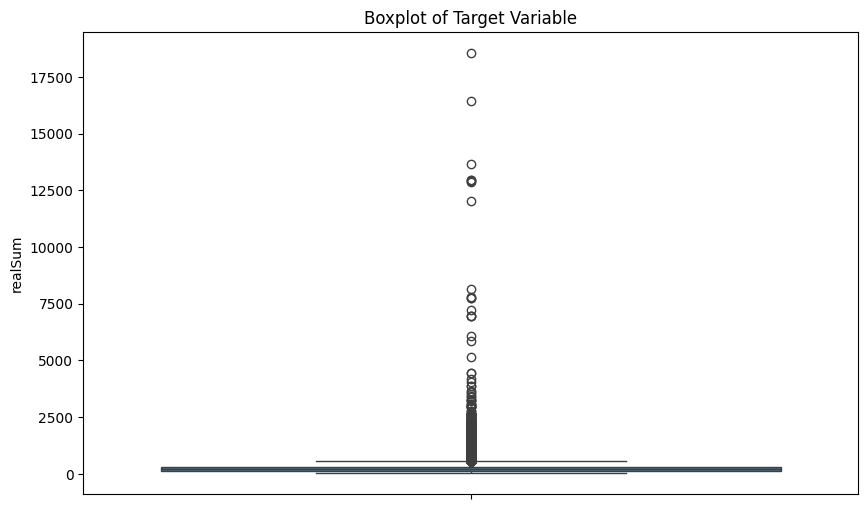

In [12]:
# Boxplot

plt.figure(figsize = (10, 6))
sns.boxplot(y_train)
plt.title('Boxplot of Target Variable')
plt.show()

Melalui density plot maupun boxplot di atas, terlihat bahwa sebenarnya sebagian besar data memiliki kisaran harga sewa tidak lebih dari 5.000 atau bahkan tidak lebih dari 2.500. Agar lebih memastikan, maka kita akan mengecek nilai kuantil-kuantil pada data misalkan untuk kuantil 90; 95; 99 dan 99,9.

In [13]:
# Mengecek nilai-nilai kuantil 90, 95, 99, 99.9
print("Kuantil-90  :", y_train.quantile(0.90))
print("Kuantil-95  :", y_train.quantile(0.95))
print("Kuantil-99  :", y_train.quantile(0.99))
print("Kuantil-99.9:", y_train.quantile(0.999))

Kuantil-90  : 501.422893294762
Kuantil-95  : 665.253052474602
Kuantil-99  : 1160.2906935722838
Kuantil-99.9: 2959.0412238990884


Nilai-nilai kuantil di atas menunjukkan harga sewa tertinggi pada batas-batas kuantil tersebut. Dari hasil tersebut kita dapatkan informasi bahwa 90% dari seluruh dataset kita memiliki harga sewa tidak lebih dari 501. Lebih lanjut, 95% memiliki harga sewa tidak lebih dari 661,99. Bahkan 99% memiliki harga sewa tidak lebih dari 1.160 dan 99,9% ternyata memiliki harga sewa tidak lebih dari 3.000.

Melihat hasil ini maka harga sewa airbnb dengan nilai yang sangat tinggi mungkin tidak begitu banyak sehingga pada contoh ini akan kita lakukan pemangkasan data dan hanya mengambil 99% data saja (silahkan mencoba mengambil batasan lainnya yang dirasa tepat, misal gunakan 99,9% data). Artinya kita akan membuang 1% data dengan harga yang sangat tinggi, hal ini dilakukan agar model dapat bekerja lebih baik secara umum tanpa terganggu dengan nilai-nilai yang ekstrim namun sebenarnya merupakan kejadian yang sedikit.


In [14]:
# Membuang data ekstrim
# Merge X_train dan y_train
data = pd.concat([X_train, y_train], axis = 1)

# Membuang 1% data dengan harga tertinggi
q_99 = data["realSum"].quantile(0.99)
data = data[data["realSum"] <= q_99]

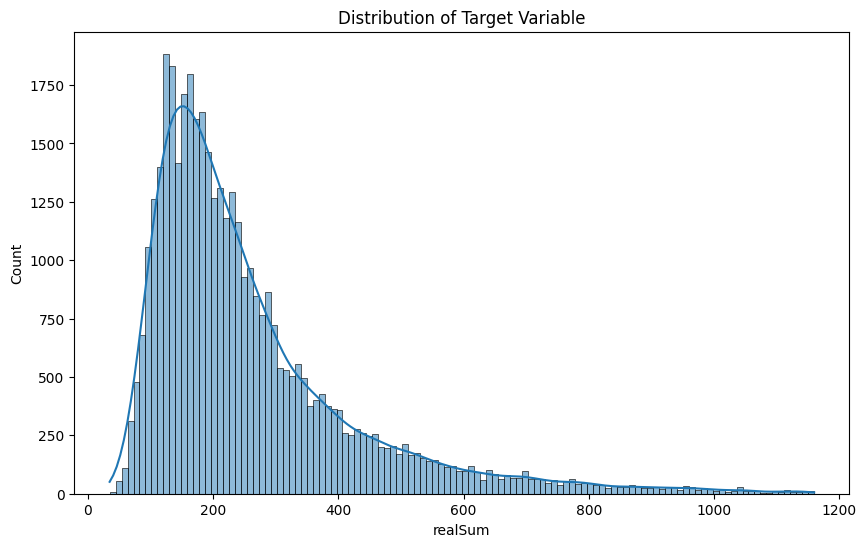

In [15]:
plt.figure(figsize = (10, 6))
sns.histplot(data["realSum"], kde = True)
plt.title('Distribution of Target Variable')
plt.show()

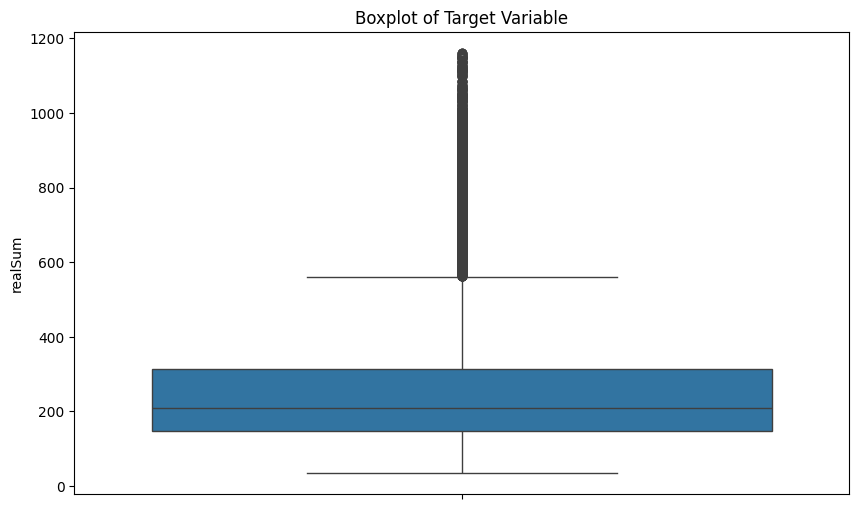

In [16]:
# Boxplot
plt.figure(figsize = (10, 6))
sns.boxplot(data["realSum"])
plt.title('Boxplot of Target Variable')
plt.show()

Setelah dilakukan pemangkasan 1% data, kini dataset yang kita miliki sudah lebih merata meskipun masih terdapat kecenderungan menjulur ke arah kanan. Namun kondisi ini bisa dikatakan jauh lebih baik dibandingkan sebelumnya.

In [17]:
# Splitting data after trimming
X_train = data.drop('realSum', axis = 1)
y_train = data['realSum']
X_train.shape, y_train.shape

((40951, 14), (40951,))

**Correlation Matrix**

<Axes: >

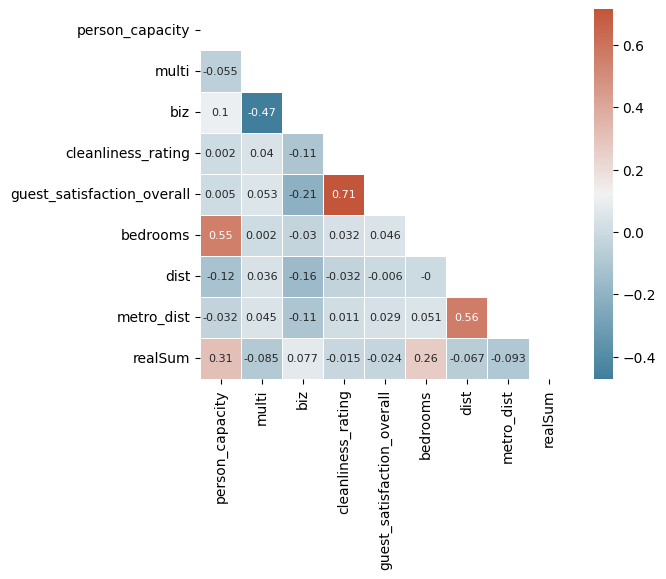

In [18]:
# Menghitung matriks korelasi untuk peubah numerik
corr_matrix = data.select_dtypes(include=['number']).corr()
corr_matrix = round(corr_matrix, 3)

# visualisasi matriks korelasi dengan heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr_matrix, annot=True, mask=mask,
            annot_kws={"fontsize": 8}, linewidths=0.5, 
            square=True, cmap=cmap)

Melihat dari matriks korelasi di atas, tidak begitu terlihat fitur-fitur yang memiliki korelasi tinggi dengan realSum. Dua fitur dengan korelasi yang lumayan adalah `person_capicity` dan `bedrooms`. Kedua fitur tersebut cukup wajar memiliki nilai yang lebih tinggi dibandingkan lainnya, dimana memang pada umumnya semakin banyak kapasitas orang yang bisa menginap serta semakin banyak jumlah kamar tidur maka harga sewa cenderung lebih tinggi.

**Prediktor Kategorik Vs Target**

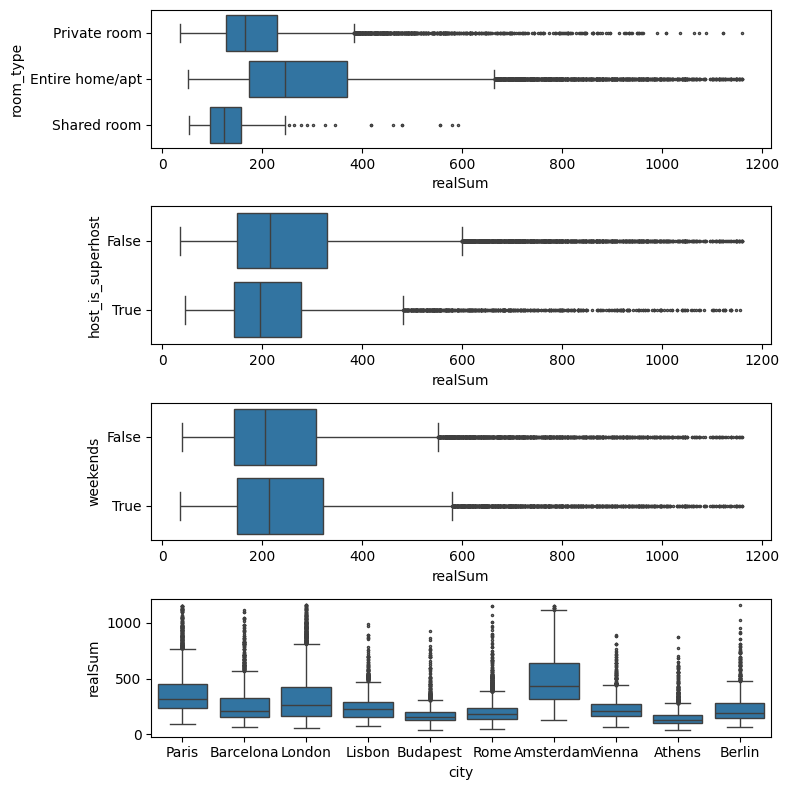

In [19]:
fig, axes = plt.subplots(4, 1, figsize=(8, 8), sharex=False)

sns.boxplot(data=data, x="realSum", y="room_type", linewidth=1,
            ax=axes[0], orient="horizontal", fliersize=1.5)

sns.boxplot(data=data, x="realSum", y="host_is_superhost", linewidth=1,
            ax=axes[1], orient="horizontal", fliersize=1.5)

sns.boxplot(data=data, x="realSum", y="weekends", linewidth=1,
            ax=axes[2], orient="horizontal", fliersize=1.5)

sns.boxplot(data=data, x="city", y="realSum", linewidth=1,
            ax=axes[3], fliersize=1.5)

fig.tight_layout()
plt.show()

Jika melihat boxplot di atas, dapat diduga bahwa fitur `room_type` dan `city` memiliki sebaran yang berbeda untuk setiap kategorinya. Misalkan pada fitur `room_type`, kategori "Entire home/apt" cenderung memiliki harga yang lebih tinggi. Selanjutnya diikuti oleh kategori "Private room" dengan harga yang lebih rendah serta kategori "Shared room" cenderung memiliki harga yang paling rendah.

Adapun untuk fitur `city`, terlihat bahwa kota Amsterdam memiliki kecenderungan harga yang lebih tinggi, kemudian diikuti oleh Paris dan London. Untuk kota-kota lainnya harga sewa umumnya lebih rendah dari ketiga kota tersebut.

Sementara itu, fitur `host_is_superhost` maupun `weekends` tampaknya tidak begitu memiliki perbedaan pada setiap kategorinya.

### Categorical Encoding

Terdapat fitur kategorik yang perlu diencode, yaitu `room_type` dan `city`.
Namun, sepertinya `room_type` sudah  di encode dengan menggunakan one-hot encoding menjadi `room_shared` dan `room_private`. Sehingga kita hanya perlu drop kolom `room_type` dan melakukan one-hot encoding pada kolom `city`.

In [20]:
# Drop kolom room_type
X_train = X_train.drop('room_type', axis = 1)
X_train.head()

,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,city,weekends
18841,False,True,2,False,1,0,9,95,1,5.440788,0.120966,Paris,True
4041,False,False,3,False,0,0,9,86,1,1.199224,0.467715,Barcelona,True
38201,False,True,2,True,1,0,10,96,1,4.595472,2.136268,London,False
35814,False,True,2,False,0,1,6,53,1,1.161165,0.507541,Lisbon,False
32816,False,False,4,False,0,1,9,92,0,0.762435,0.285698,Budapest,False


In [21]:
# One Hot Encoding
X_train = pd.get_dummies(X_train, columns = ['city'], drop_first = True)
X_train.head()

,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,...,weekends,city_Athens,city_Barcelona,city_Berlin,city_Budapest,city_Lisbon,city_London,city_Paris,city_Rome,city_Vienna
18841,False,True,2,False,1,0,9,95,1,5.440788,...,True,False,False,False,False,False,False,True,False,False
4041,False,False,3,False,0,0,9,86,1,1.199224,...,True,False,True,False,False,False,False,False,False,False
38201,False,True,2,True,1,0,10,96,1,4.595472,...,False,False,False,False,False,False,True,False,False,False
35814,False,True,2,False,0,1,6,53,1,1.161165,...,False,False,False,False,False,True,False,False,False,False
32816,False,False,4,False,0,1,9,92,0,0.762435,...,False,False,False,False,True,False,False,False,False,False


In [22]:
X_train.shape

(40951, 21)

### Standardization Numerical Features

In [23]:
from sklearn.preprocessing import StandardScaler
X_train_num = X_train.select_dtypes(include = ['float64', 'int64'])
scaler = StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train_num)
X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns = X_train_num.columns)
X_train_num_scaled.head()

,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist
0,-0.887220,1.554074,-0.733293,-0.405012,0.267285,-0.238614,0.927415,-0.649471
1,-0.113347,-0.643470,-0.733293,-0.405012,-0.736979,-0.238614,-0.833544,-0.252216
2,-0.887220,1.554074,-0.733293,0.636669,0.378870,-0.238614,0.576467,1.659370
3,-0.887220,-0.643470,1.363711,-3.530054,-4.419279,-0.238614,-0.849345,-0.206589
4,0.660525,-0.643470,1.363711,-0.405012,-0.067470,-1.857210,-1.014885,-0.460745


In [24]:
X_train_num_scaled.shape

(40951, 8)

In [25]:
# Menggabungkan kembali data numerik dan kategorik
X_train = pd.concat([X_train_num_scaled.reset_index(drop=True), X_train.drop(X_train_num.columns, axis=1).reset_index(drop=True)], axis=1)
X_train.head()

,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,room_shared,room_private,...,weekends,city_Athens,city_Barcelona,city_Berlin,city_Budapest,city_Lisbon,city_London,city_Paris,city_Rome,city_Vienna
0,-0.887220,1.554074,-0.733293,-0.405012,0.267285,-0.238614,0.927415,-0.649471,False,True,...,True,False,False,False,False,False,False,True,False,False
1,-0.113347,-0.643470,-0.733293,-0.405012,-0.736979,-0.238614,-0.833544,-0.252216,False,False,...,True,False,True,False,False,False,False,False,False,False
2,-0.887220,1.554074,-0.733293,0.636669,0.378870,-0.238614,0.576467,1.659370,False,True,...,False,False,False,False,False,False,True,False,False,False
3,-0.887220,-0.643470,1.363711,-3.530054,-4.419279,-0.238614,-0.849345,-0.206589,False,True,...,False,False,False,False,False,True,False,False,False,False
4,0.660525,-0.643470,1.363711,-0.405012,-0.067470,-1.857210,-1.014885,-0.460745,False,False,...,False,False,False,False,True,False,False,False,False,False


In [26]:
X_train.shape

(40951, 21)

** Log Transformation for Target Variable **

In [27]:
y_train = np.log1p(y_train)

### Data Preprocessing Function for Test Data

In [28]:
def preprocess_data(data, scaler, numerical_columns):
    """
    Fungsi untuk melakukan preprocessing data test
    :param data: <pandas dataframe> data test
    :param scaler: <sklearn.preprocessing> object scaler
    :param numerical_columns: <list> list nama kolom numerik
    :return data_preprocessed: <pandas dataframe> data test yang sudah dipreprocessing
    """
    # Drop kolom room_type
    data = data.drop('room_type', axis = 1)
    
    # One Hot Encoding
    data = pd.get_dummies(data, columns = ['city'], drop_first = True)
    
    # Standardization
    data_num = data[numerical_columns]
    data_num_scaled = scaler.transform(data_num)
    data_num_scaled = pd.DataFrame(data_num_scaled, columns = data_num.columns)

    # Menggabungkan kembali data numerik dan kategorik
    data_preprocessed = pd.concat([data_num_scaled.reset_index(drop=True), data.drop(data_num.columns, axis=1).reset_index(drop=True)], axis=1)

    return data_preprocessed

In [29]:
X_test = preprocess_data(X_test, scaler, X_train_num.columns)

In [30]:
y_test = np.log1p(y_test)

## Training a Machine Learning Models

### Model Decision Tree Regressor Tanpa Hyperparameter Tuning

In [31]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

model_dt = DecisionTreeRegressor(random_state = 123)
model_dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=123)

### Model Random Forest Regressor Tanpa Hyperparameter Tuning

In [37]:
from sklearn.ensemble import RandomForestRegressor

# Membuat model Random Forest Regressor
model_rf = RandomForestRegressor(random_state=123)
model_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=123)

### Model Decision Tree Regressor dengan Hyperparameter Tuning

In [32]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [5, 10, 15, 20, 25],
    'min_samples_split': [2, 5, 10, 15, 100],
    'min_samples_leaf': [1, 2, 5, 10, 15],
    'max_features' : [5, 7, 10, 15, 21],
}                       

Pamanfaatan `GridSearchCV` untuk mencari parameter terbaik pada model Decision Tree Regressor. Detil hyperparameter yang dimiliki oleh model Decision Tree Regressor dapat dilihat pada [dokumentasi](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html).

Atau dapat menggunakan fungsi `get_params()` untuk mengetahui apa saja hyperparameter yang dimiliki oleh model.

In [33]:
# Tunjukan apa saja hyperparameter yang bisa digunakan
model_dt.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 123,
 'splitter': 'best'}

Hyperparameter yang akan di tuning adalah `max_depth`, `min_samples_split`, `min_samples_leaf`, dan `max_features`.

Keterangan:

- `max_depth` : Maximum depth of the tree.
- `min_samples_split` : The minimum number of samples required to split an internal node.
- `min_samples_leaf` : The minimum number of samples required to be at a leaf node.
- `max_features` : The number of features to consider when looking for the best split.

In [34]:
model_df_cv = GridSearchCV(DecisionTreeRegressor(random_state = 123), 
                            param_grid, 
                            scoring= 'neg_mean_squared_error',
                            cv = 10, 
                            n_jobs = -1)
# n_jobs = -1 untuk menggunakan semua core CPU

model_df_cv.fit(X_train, y_train)     

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=123),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20, 25],
                         'max_features': [5, 7, 10, 15, 21],
                         'min_samples_leaf': [1, 2, 5, 10, 15],
                         'min_samples_split': [2, 5, 10, 15, 100]},
             scoring='neg_mean_squared_error')

In [35]:
# Best parameter
model_df_cv.best_params_

{'max_depth': 25,
 'max_features': 21,
 'min_samples_leaf': 2,
 'min_samples_split': 10}

### Model Random Forest Regressor dengan Hyperparameter Tuning

In [38]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [41]:
modell_rf_cv = GridSearchCV(RandomForestRegressor(random_state=123), 
               param_grid_rf, 
               scoring='neg_mean_squared_error', 
               cv=5, 
               n_jobs=-1)
modell_rf_cv.fit(X_train, y_train)

c:\Users\derik\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
675 fits failed out of a total of 2025.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
318 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\derik\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\derik\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "c

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=123), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20, None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [42]:
# Best parameter
modell_rf_cv.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

## Evaluasi Model

In [43]:
y_pred_dt = model_dt.predict(X_test)
y_pred_dt_cv = model_df_cv.predict(X_test)

y_pred_rf = model_rf.predict(X_test)
y_pred_rf_cv = modell_rf_cv.predict(X_test)

mse_dt = mean_squared_error(y_test, y_pred_dt)
mse_dt_cv = mean_squared_error(y_test, y_pred_dt_cv)

mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_rf_cv = mean_squared_error(y_test, y_pred_rf_cv)

print('MSE Decision Tree Regressor (Tanpa Hyperparameter Tuning) :', round(mse_dt, 3))
print('MSE Decision Tree Regressor (Dengan Hyperparameter Tuning):', round(mse_dt_cv, 3))
print('MSE Random Forest Regressor (Tanpa Hyperparameter Tuning) :', round(mse_rf, 3))
print('MSE Random Forest Regressor (Dengan Hyperparameter Tuning):', round(mse_rf_cv, 3))

MSE Decision Tree Regressor (Tanpa Hyperparameter Tuning) : 0.103
MSE Decision Tree Regressor (Dengan Hyperparameter Tuning): 0.108
MSE Random Forest Regressor (Tanpa Hyperparameter Tuning) : 0.073
MSE Random Forest Regressor (Dengan Hyperparameter Tuning): 0.092


Hasi evaluasi model menunjukkan bahwa model Decision Tree Regressor dengan hyperparameter tuning relatif tidak jauh berbeda dengan model Decision Tree Regressor tanpa hyperparameter tuning, bahkan sedikt lebih buruk. Hal ini bisa saja terjadi karena model yang kita gunakan sudah cukup baik tanpa perlu melakukan tuning lebih lanjut. Namun, kita tidak bisa mengetahui secara pasti tanpa melakukan tuning lebih lanjut atau menggunakan model lainnya.